In [57]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import linalg
from matplotlib.cm import get_cmap

#homework3
#2.1
plt.rcParams['figure.figsize'] = [16, 8]

A = imread(os.path.join('..', 'DATA','dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

In [58]:
Bt = np.fft.fft2(X)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude
ratio = np.array(np.arange(0.01,1, 0.01))
err = np.zeros(len(ratio))
# Zero out all small coefficients and inverse transform
for i in range(len(ratio)):
    thresh = Btsort[int(np.floor((1-ratio[i])*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    err[i] = np.linalg.norm(Alow-X)/np.linalg.norm(X)


Text(0.5, 1.0, 'compression error')

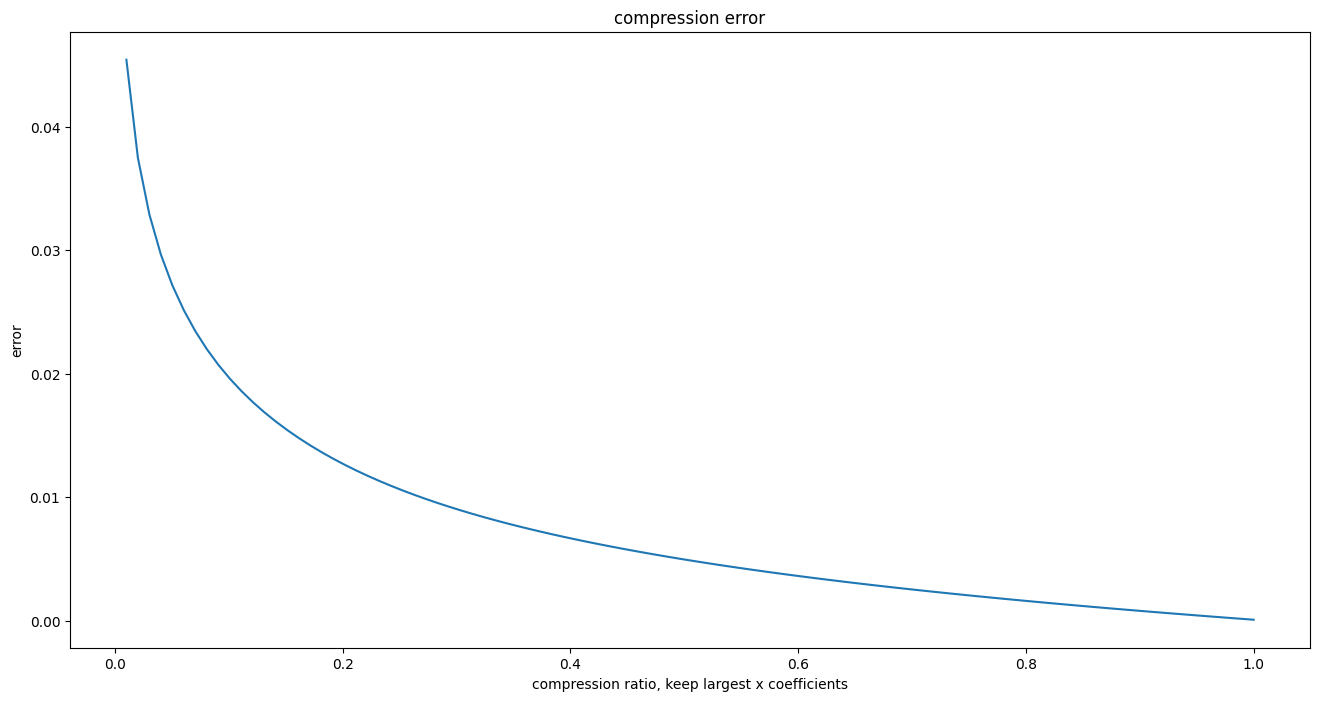

In [59]:
y = np.linspace(0.01, 1, 99)
plt.plot(y,err)
plt.xlabel('compression ratio, keep largest x coefficients')
plt.ylabel('error')
plt.title('compression error')

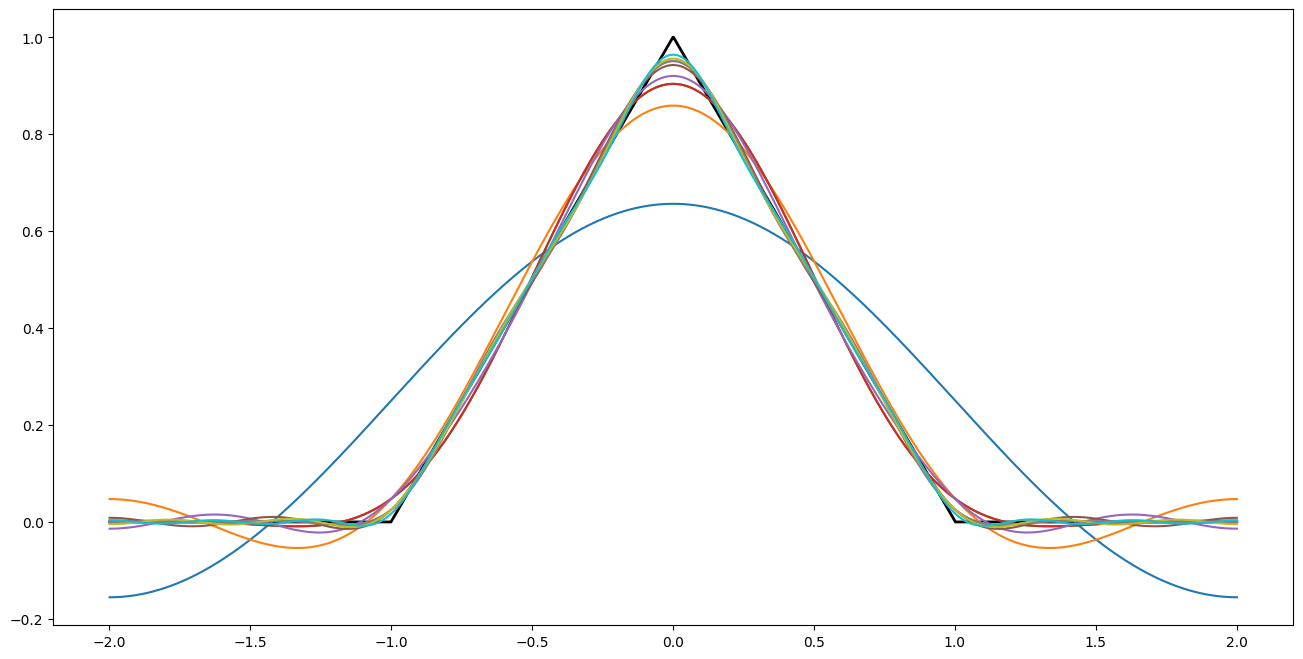

In [66]:
#2.2
#fourier series
#define domain
dx = 0.001
L = 2
x = 2*np.arange(-1+dx,1+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)
fig, ax = plt.subplots()
ax.plot(x,f,'-',color='k',linewidth=2)

name = "Accent"
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0/2

A = np.zeros(100)
B = np.zeros(100)
for k in range(10):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
    ax.plot(x,fFS,'-')


**plot first 100 coefficients a_n and b_n, n = 1,2,...,100**

Text(0.5, 1.0, 'coefficients of b_n')

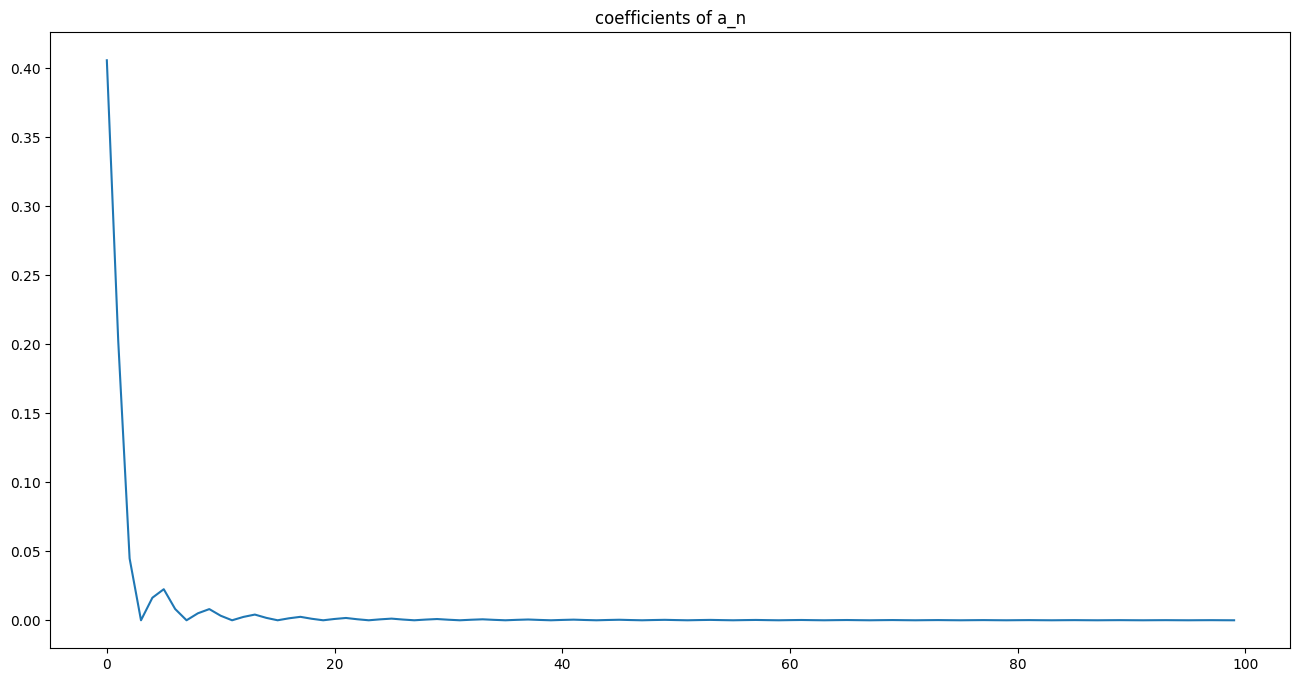

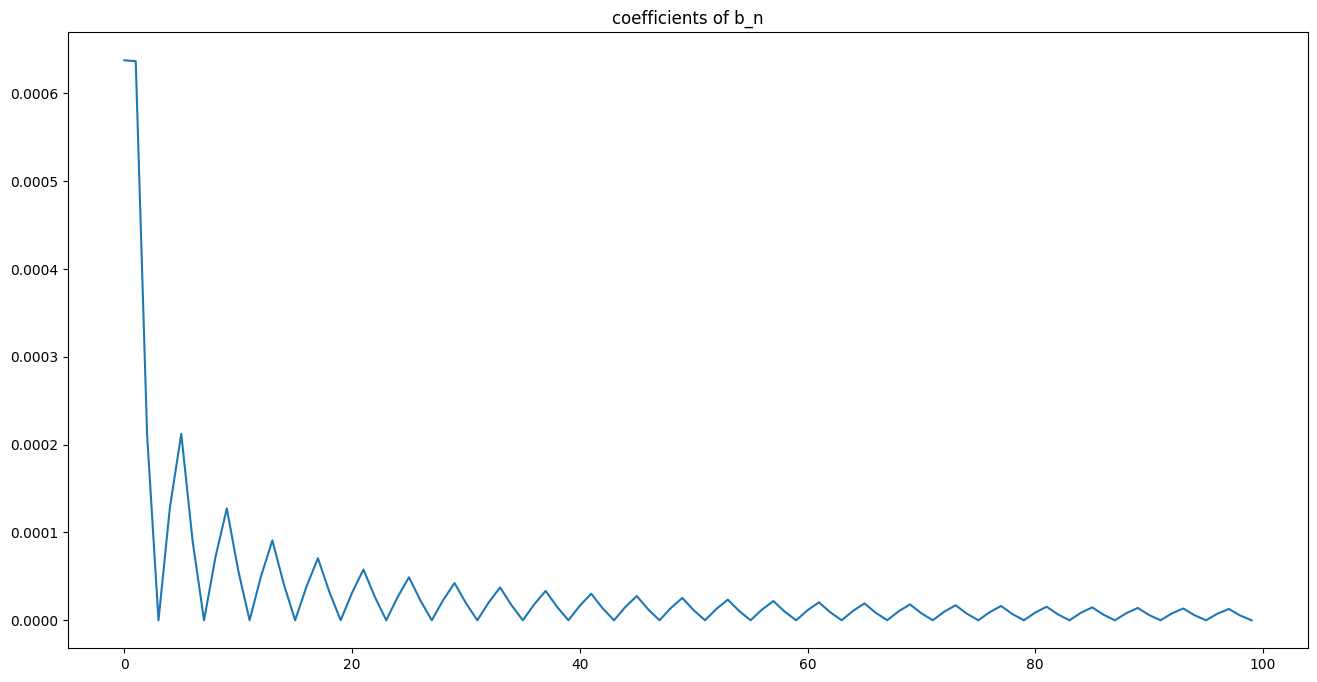

In [76]:
A = np.zeros(100)
B = np.zeros(100)
for k in range(100):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
plt.figure()
plt.plot(A)
plt.title('coefficients of a_n')

plt.figure()
plt.plot(B)
plt.title('coefficients of b_n')